# Noise levels

_28 August 2021_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

This investigates the effect of noise on the CIFAR-10 simple model.

In [1]:
import matplotlib.pyplot as plt
from plotting import plot_averaged_training_charts, make_axes, show_timestamp_info

In [2]:
common_specs = {
    'batch_size':               ('expect', 64),
    'noise':                    ('series', '__all__'),
    'dataset':                  ('title',  'cifar10-simple-flipcrop'),
}
federated_specs = common_specs.copy()
federated_specs.update({
    'script': 'dynpower.py',
    'epochs':                   ('expect', 1),
    'clients':                  ('title',  20),
    'rounds':                   ('expect', 20),
    'ema_coefficient':          ('expect', 1 / 3),
    'save_squared_error':       ('expect', False),
    'send':                     ('expect', 'deltas'),
    'power':                    ('title',  1.0),
    'power_update_period':      ('expect', 1),
    'power_factor':             ('expect', 0.9),
    'power_quantile':           ('expect', 1.0),
    'parameter_radius_initial': ('expect', 1.0),
    'optimizer_client':         ('expect', 'sgd'),
    'lr_client':                ('expect', 0.001),
    'momentum_client':          ('expect', 0.9),
    'weight_decay_client':      ('expect', 0.0),
    'lr_scheduler_client':      ('expect', 'none'),
    'data_per_client':          ('expect', None),
    'clients':                  ('title',  20),
    'client_sync':              ('expect', True),
})
simple_specs = common_specs.copy()
simple_specs.update({
    'script': 'addnoise.py',
    'epochs':                   ('expect', 20),
    'optimizer':                ('expect', 'sgd'),
    'learning_rate':            ('expect', 0.001),
    'momentum':                 ('expect', 0.9),
    'weight_decay':             ('expect', 0.0),
    'lr_scheduler':             ('expect', 'none'),
})

In [3]:
paths = [
    "results/20210826-cifar10-simple-noise-levels/",
]
show_timestamp_info(paths)

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **26 Aug 2021, 18:52:56** | 26 Aug 2021, 18:58:39 | 5 min 43 s |
| last to finish | 27 Aug 2021, 23:12:49 | **27 Aug 2021, 23:18:29** | 5 min 40 s |
| shortest | 27 Aug 2021, 16:59:21 | 27 Aug 2021, 17:04:45 | **5 min 24 s** |
| longest | 26 Aug 2021, 23:39:42 | 26 Aug 2021, 23:45:32 | **5 min 50 s** |


- Skipping 270 runs using 1 other scripts: addnoise.py (270)


(0.0, 4.0)

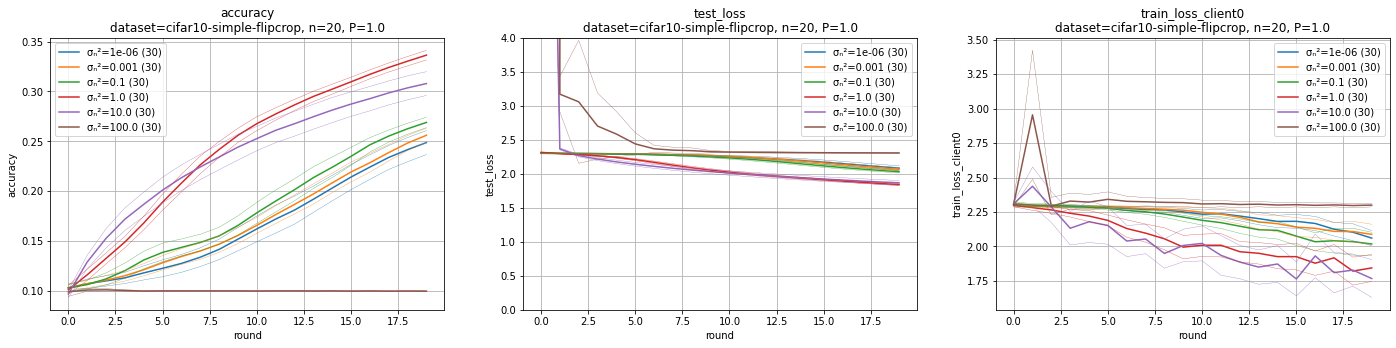

In [4]:
axs = make_axes(3)
plot_averaged_training_charts(paths, ['accuracy', 'test_loss', 'train_loss_client0'], federated_specs, extra_lines=[('confints', 0.2)], axs=axs)
axs[1].set_ylim(0, 4)

- Skipping 180 runs using 1 other scripts: dynpower.py (180)


(0.0, 7.0)

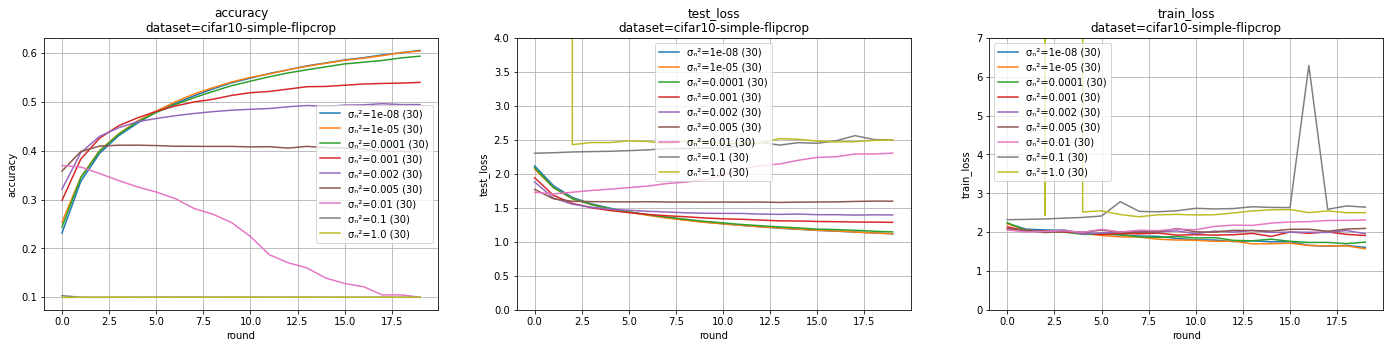

In [5]:
axs = make_axes(3)
plot_averaged_training_charts(paths, ['accuracy', 'test_loss', 'train_loss'], simple_specs, axs=axs)
axs[1].set_ylim(0, 4)
axs[2].set_ylim(0, 7)

- Skipping 180 runs using 1 other scripts: dynpower.py (180)
- Skipping 90 runs that don't match on 1 keys: noise (90)


(1.5, 3.0)

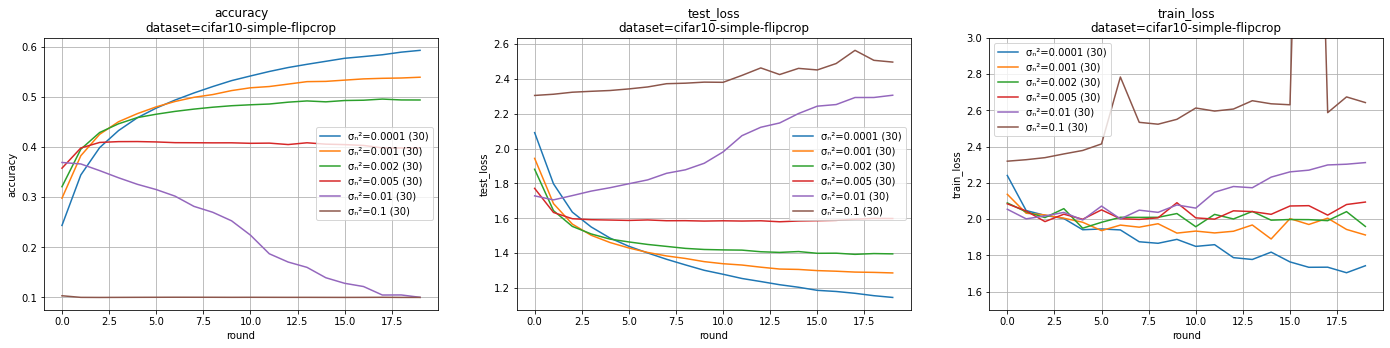

In [6]:
simple_specs['noise'] = ('series', lambda x: x >= 1e-4 and x < 1)
axs = make_axes(3)
plot_averaged_training_charts(paths, ['accuracy', 'test_loss', 'train_loss'], simple_specs, axs=axs)
axs[2].set_ylim(1.5, 3)